In [4]:
# CIFAR-10-C: Corrupted versions of CIFAR-10 images.
# TODO: Use CIFAR-100 instead.

!wget https://zenodo.org/records/2535967/files/CIFAR-10-C.tar

--2023-12-15 22:04:04--  https://zenodo.org/records/2535967/files/CIFAR-10-C.tar
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2918471680 (2.7G) [application/octet-stream]
Saving to: ‘CIFAR-10-C.tar’

CIFAR-10-C.tar      100%[===================>]   2.72G   145MB/s    in 18s     

2023-12-15 22:04:22 (154 MB/s) - ‘CIFAR-10-C.tar’ saved [2918471680/2918471680]



In [4]:
!pwd

/content/sas-data-efficient-contrastive-learning


In [ ]:
# Raw CIFAR-10
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2023-12-06 05:54:11--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.2’

cifar-10-python.tar 100%[===================>] 162.60M  46.3MB/s    in 3.9s    

2023-12-06 05:54:16 (41.3 MB/s) - ‘cifar-10-python.tar.gz.2’ saved [170498071/170498071]



In [ ]:
!ls -l
!tar -xvf cifar-10-python.tar.gz

!ls -l cifar-10-batches-py/test_batch

total 3016596
drwxr-xr-x 2 2156 1103       4096 Jun  4  2009 cifar-10-batches-py
drwxrwxr-x 2 1189 2002       4096 Nov 25  2018 CIFAR-10-C
-rw-r--r-- 1 root root 2918471680 Dec  5 08:04 CIFAR-10-C.tar
-rw-r--r-- 1 root root  170498071 Jun  4  2009 cifar-10-python.tar.gz
drwxr-xr-x 1 root root       4096 Dec  1 14:24 sample_data
drwxr-xr-x 9 root root       4096 Dec  5 09:04 sas-data-efficient-contrastive-learning


In [5]:
!tar -xvf CIFAR-10-C.tar
!ls CIFAR-10-C

CIFAR-10-C/
CIFAR-10-C/fog.npy
CIFAR-10-C/jpeg_compression.npy
CIFAR-10-C/zoom_blur.npy
CIFAR-10-C/speckle_noise.npy
CIFAR-10-C/glass_blur.npy
CIFAR-10-C/spatter.npy
CIFAR-10-C/shot_noise.npy
CIFAR-10-C/defocus_blur.npy
CIFAR-10-C/elastic_transform.npy
CIFAR-10-C/gaussian_blur.npy
CIFAR-10-C/frost.npy
CIFAR-10-C/saturate.npy
CIFAR-10-C/brightness.npy
CIFAR-10-C/snow.npy
CIFAR-10-C/gaussian_noise.npy
CIFAR-10-C/motion_blur.npy
CIFAR-10-C/contrast.npy
CIFAR-10-C/impulse_noise.npy
CIFAR-10-C/labels.npy
CIFAR-10-C/pixelate.npy
brightness.npy	       fog.npy		   glass_blur.npy	 motion_blur.npy  snow.npy
contrast.npy	       frost.npy	   impulse_noise.npy	 pixelate.npy	  spatter.npy
defocus_blur.npy       gaussian_blur.npy   jpeg_compression.npy  saturate.npy	  speckle_noise.npy
elastic_transform.npy  gaussian_noise.npy  labels.npy		 shot_noise.npy   zoom_blur.npy


In [ ]:
# Unpack CIFAR-10-C

import numpy as np
import matplotlib.pyplot as plt
import os

DIR = 'CIFAR-10-C'
lb = np.load(os.path.join(DIR,'labels.npy'))
cifar10c = np.load('CIFAR-10-C/fog.npy')
print(lb)

cifar10c.shape

[3 8 8 ... 5 1 7]


In [ ]:
# Text labels for classes.

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck']
index_to_label = {i: label for i, label in enumerate(labels)}

print(index_to_label)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
x = unpickle('cifar-10-batches-py/test_batch')

im = x[b'data'][0]

In [ ]:
# Unpack CIFAR-10

import pickle
f = open('cifar-10-batches-py/test_batch', 'rb')
datadict = pickle.load(f, encoding='latin1')
f.close()
X = datadict['data']
print(X.shape)
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

(10000, 3072)


In [ ]:
for i in range(10):
  print(index_to_label[Y[i]])
# plt.imshow(X[0])
# plt.imshow(X[1])

cat
ship
ship
airplane
frog
frog
automobile
frog
cat
automobile


In [ ]:
# Check correspondence.
for i in range(X.shape[0]):
  # print(X[i].shape)
  # print(data[i].shape)
  if np.array_equal(X[i], cifar10c[i]):
    print('YAY!!')

NameError: ignored

cat
ship
ship
airplane


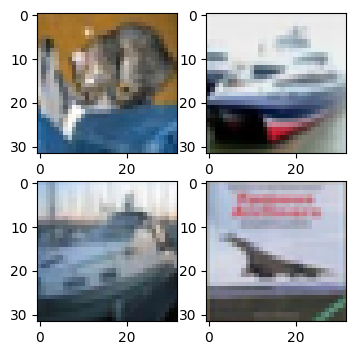

In [ ]:
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(4, 4))

# setting values to rows and column variables
rows = 2
columns = 2

for i in range(4):
  print(index_to_label[Y[i]])
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)

  # showing image
  plt.imshow(X[i])

cat
ship
ship
airplane


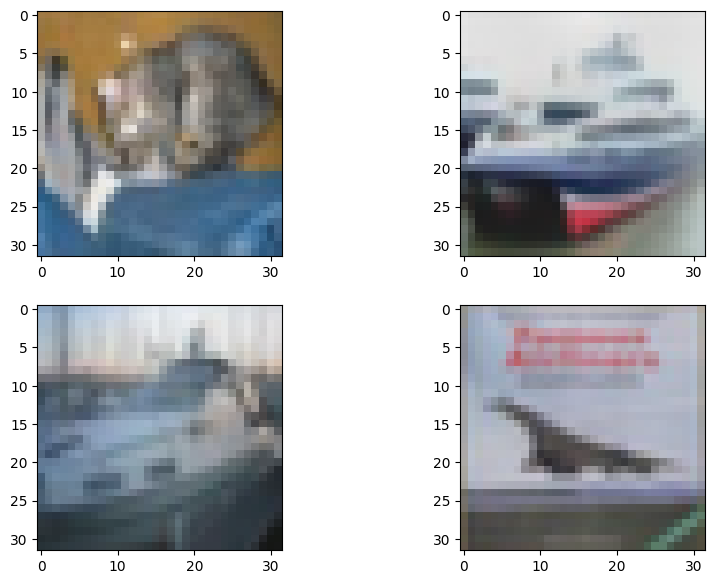

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

for i in range(4):
  print(index_to_label[lb[i]])
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, i+1)

  # showing image
  plt.imshow(data[i])

ship


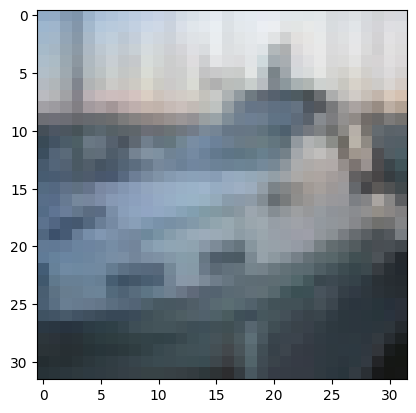

In [ ]:
plt.imshow(data[2])
print(index_to_label[lb[2]])

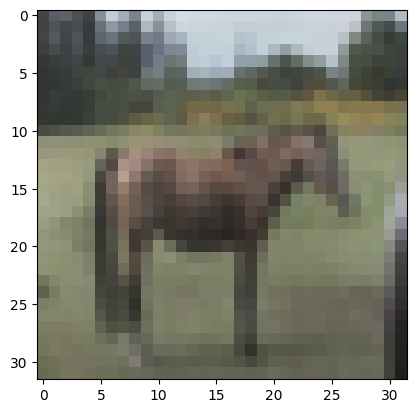

In [ ]:
plt.imshow(data[9999])

# Beginning of SAS part (START HERE IF YOU DON'T NEED CIFAR-10-C)

> Indented block



In [1]:
!git clone https://github.com/sjoshi804/sas-data-efficient-contrastive-learning.git

Cloning into 'sas-data-efficient-contrastive-learning'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 272 (delta 36), reused 39 (delta 29), pack-reused 220
Receiving objects: 100% (272/272), 24.19 MiB | 24.72 MiB/s, done.
Resolving deltas: 100% (143/143), done.


In [2]:
!ls
%cd ./sas-data-efficient-contrastive-learning
# !pwd

sample_data  sas-data-efficient-contrastive-learning
/content/sas-data-efficient-contrastive-learning


In [3]:
# asposestorage==1.0.2
# openai-clip
# fast_pytorch_kmeans==0.1.6
# numpy==1.23.1
# pandas==1.5.1
# Pillow==9.5.0
# setuptools==63.4.1
# torch==1.12.1
# torchvision==0.13.1
# tqdm==4.64.1
# wandb

# Remember to update the requirements.txt file before running the next line

## Replace requirements.txt with the block above (uncomment first)!!

OR (individually) replace clip in requirements with openai-clip, delete Pillow==9.2.0, add wandb.

In [3]:
# Replace clip in requirements with openai-clip, delete Pillow, add wandb, or
# copy from the block above (uncomment first)!!
!pip install -r requirements.txt

!pip install sas-pip/

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.6 MB/s eta 0:0

Processing ./sas-pip
  Preparing metadata (setup.py) ... done
  Created wheel for sas: filename=sas-1.0-py3-none-any.whl size=6289 sha256=382a7161502dfe7771c16954969fec3bd63f69836a8c3e197f3db82864d23676
  Stored in directory: /root/.cache/pip/wheels/5a/80/5f/4f77ca879b91a1f5f78a11be811243d69527d564efb1eb9d6b
Successfully built sas


In [ ]:
# !pip install sas-pip/

# !pip install openai-clip
# !pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
# !pip install --upgrade torch torchvision
# !pip install openai-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.9 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368605 sha256=b5d3c3c32ba366d20f3d0aa32f0985fd4cc5b8631139ee3952e489b1d92b4d26
  Stored in directory: /root/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip


In [ ]:
# import torchvision
# print(type(X[0]))
# print(X.shape)
# X = X.transpose(1, 2)

In [ ]:
# # Replace clip in requirements with openai-clip, delete Pillow
# !pip install -r requirements.txt

# from torch.utils.data import Dataset

# from PIL import Image

# X = np.transpose(X, (0, 3, 1, 2)).astype(np.uint8)

# class MyDataset(Dataset):
#     def __init__(self, data, labels):
#         # super().__init__(dataset=data)
#         self.data = data
#         self.labels = labels

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
#         label = self.labels[index]
#         image = self.data[index]
#         # print(image.shape)
#         image = Image.fromarray(image)
#         if self.transform:
#             image = self.transform(image)
#         # print(label)
#         return image, label

# cifar = MyDataset(X, Y.astype(np.uint8))

# print(len(cifar))
# print(type(Y[0]))

In [ ]:
# # Replace clip in requirements with openai-clip, delete Pillow
# !pip install -r requirements.txt

# import torchvision
# from torch.utils.data import Dataset

# from PIL import Image

# X = np.transpose(X, (0, 3, 1, 2)).astype(np.uint8)

# class MyDataset(Dataset):
#     def __init__(self, data, labels):
#         # super().__init__(dataset=data)
#         self.data = data
#         self.labels = labels

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
#         label = self.labels[index]
#         image = self.data[index]
#         # print(image.shape)
#         image = Image.fromarray(image)
#         if self.transform:
#             image = self.transform(image)
#         # print(label)
#         return image, label

# cifar = MyDataset(X, Y.astype(np.uint8))

# print(len(cifar))
# print(type(Y[0]))


# # SCRAP
# class MyDataset(torchvision.datasets.CIFAR100):
#     # def __init__(self, data, labels):
#     #     super().__init__(**locals())

#     # def __len__(self):
#     #     return len(self.data)

#     def __getitem__(self, index):
#         global first, first2
#         image, label = super().__getitem__(index)

#         if index in noisy_indices:
#           # print('RAND')
#           # image = add_noise(image)
#           # image = image.filter(ImageFilter.GaussianBlur(5))
#           # image2 = add_noise_to_image(image)
#           # noisy_indices.append(index)
#           image2 = torch.zeros_like(image)
#           if first:
#             first = False
#             # plt.imshow(image.permute(1, 2, 0))
#             # plt.imshow(image2.permute(1, 2, 0))
#             plt2(image.permute(1, 2, 0), image2.permute(1, 2, 0))
#             # plt.show()
#             # print(image.shape)
#             # print(image2.shape
#             # assert False
#           image = image2
#         # if image is None:
#         #   print('DAMN')
#         #   print(im)
#         #   print('DAMN 2')
#         #   print(index)
#         #   print(label)
#         # image.to('cpu')
#         if first2 and index in noisy_indices:
#           print(image)
#           first2 = False
#         return image, label

Run the next block, but don't modify (just copied from their code to help debug)

In [ ]:
# Copied from sas-pip/sas/approx_latent_classes.py for debugging.

from copy import deepcopy
from typing import List

import clip
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from fast_pytorch_kmeans import KMeans
from tqdm import tqdm

def clip_approx(
    img_trainset: torch.utils.data.Dataset,
    labeled_example_indices: List[int],
    labeled_examples_labels: np.array,
    num_classes: int,
    device: torch.device,
    batch_size: int = 512,
    verbose: bool = False,
):
    Z = encode_using_clip(
        img_trainset=img_trainset,
        device=device,
        batch_size=batch_size,
        verbose=verbose
    )
    clf = train_linear_classifier(
        X=Z[labeled_example_indices],
        y=torch.tensor(labeled_examples_labels),
        representation_dim=len(Z[0]),
        num_classes=num_classes,
        device=device,
        verbose=verbose
    )
    preds = []
    for start_idx in range(0, len(Z), batch_size):
        preds.append(torch.argmax(clf(Z[start_idx:start_idx + batch_size]).detach(), dim=1).cpu())
    preds = torch.cat(preds).numpy()

    return partition_from_preds(preds)

def clip_0shot_approx(
    img_trainset: torch.utils.data.Dataset,
    class_names: List[str],
    device: torch.device,
    verbose: bool = False,
):
    model, preprocess = clip.load("ViT-B/32", device=device)
    img_trainset = deepcopy(img_trainset)
    img_trainset.transform = preprocess

    zeroshot_weights = zeroshot_classifier(
        class_names=class_names,
        device=device,
        verbose=verbose
    )
    logits = []
    loader = torch.utils.data.DataLoader(img_trainset, batch_size=32, num_workers=2)
    with torch.no_grad():
        for input in tqdm(loader, "0-shot classification using provided text names for classes", disable=not verbose):
            # predict
            image_features = model.encode_image(input[0].to(device=device))
            image_features /= image_features.norm(dim=-1, keepdim=True)
            logits.append(100. * image_features @ zeroshot_weights)

    preds = []
    for logit in logits:
        preds.append(logit.topk(1, 1, True, True)[1].t()[0])

    return partition_from_preds(preds)

def kmeans_approx(
    trainset: torch.utils.data.Dataset,
    proxy_model: nn.Module,
    num_classes: int,
    device: torch.device,
    verbose: bool = False
):
    proxy_model.eval()
    Z = []
    with torch.no_grad():
        loader = torch.utils.data.DataLoader(trainset, batch_size=32, num_workers=2)
        for input in tqdm(loader, "Encoding data using proxy model provided", disable=not verbose):
            Z.append(proxy_model(input[0].to(device)))
    Z = torch.cat(Z, dim=0).to("cpu")
    kmeans = KMeans(n_clusters=num_classes, mode='euclidean', verbose=int(verbose), max_iter=1000)
    preds = kmeans.fit_predict(Z).cpu().numpy()
    return partition_from_preds(preds)

def encode_using_clip(
        img_trainset: torch.utils.data.Dataset,
        device: torch.device,
        batch_size=512,
        verbose: bool = False,
):
    model, preprocess = clip.load("ViT-B/32", device=device)
    img_trainset = deepcopy(img_trainset)
    img_trainset.transform = preprocess

    loader = torch.utils.data.DataLoader(img_trainset, batch_size=batch_size, num_workers=8)
    Z = []
    with torch.no_grad():
        for input in tqdm(loader, desc="Encoding images using CLIP", disable=not verbose):
            Z.append(model.encode_image(input[0].to(device)))
    Z = torch.cat(Z, dim=0).to(torch.float32)
    return Z

def partition_from_preds(preds):
    partition = {}
    for i, pred in enumerate(preds):
        if pred not in partition:
            partition[pred] = []
        partition[pred].append(i)
    return partition

def train_linear_classifier(
    X: torch.tensor,
    y: torch.tensor,
    representation_dim: int,
    num_classes: int,
    device: torch.device,
    reg_weight: float = 1e-3,
    n_lbfgs_steps: int = 500,
    verbose=False,
):
    if verbose:
        print('\nL2 Regularization weight: %g' % reg_weight)

    criterion = nn.CrossEntropyLoss()
    X_gpu = X.to(device)
    y_gpu = y.to(device)

    # Should be reset after each epoch for a completely independent evaluation
    clf = nn.Linear(representation_dim, num_classes).to(device)
    clf_optimizer = optim.LBFGS(clf.parameters())
    clf.train()

    for _ in tqdm(range(n_lbfgs_steps), desc="Training linear classifier using fraction of labels", disable=not verbose):
        def closure():
            clf_optimizer.zero_grad()
            raw_scores = clf(X_gpu)
            loss = criterion(raw_scores, y_gpu)
            loss += reg_weight * clf.weight.pow(2).sum()
            loss.backward()
            return loss
        clf_optimizer.step(closure)
    return clf

def zeroshot_classifier(
    class_names: List[str],
    device: torch.device,
    verbose: bool = False
):
    templates = [
        'itap of the {}.',
        'a bad photo of the {}',
        'a origami {}.',
        'a photo of the large {}.',
        'a {} in a video game.',
        'art of the {}.',
        'a photo of the small {}.',
    ]

    model, _ = clip.load("ViT-B/32")
    model = model.to(device)

    with torch.no_grad():
        zeroshot_weights = []
        for classname in tqdm(class_names, desc="Creating zero shot classifier", disable=not verbose):
            texts = [template.format(classname) for template in templates] #format with class
            texts = clip.tokenize(texts).to(device) #tokenize
            class_embeddings = model.encode_text(texts) #embed with text encoder
            class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
            class_embedding = class_embeddings.mean(dim=0)
            class_embedding /= class_embedding.norm()
            zeroshot_weights.append(class_embedding)
        zeroshot_weights = torch.stack(zeroshot_weights, dim=1)
    return zeroshot_weights

## The next block does most of the work.

It creates the noisy dataset and then partitions it using CLIP. The following block uses the result to run SAS, then we can determine the percentage of noisy examples removed.

Look here to try to find bugs/change the noise type/dataset used.

In [ ]:
import torchvision
from torch.utils.data import Dataset

# from sas.approx_latent_classes import clip_approx
from sas.subset_dataset import SASSubsetDataset
import random
from torchvision import transforms
import torch
import random
from PIL import Image, ImageFilter

import numpy as np
import matplotlib.pyplot as plt
import os

# def add_noise(x, mean, stddev):
#   return min(max(0, x+random.normalvariate(mean,stddev)), 255)

# def add_noise_one_pixel(im, x, y, mean=10, stddev=5):
#   x, y, z = im.getpixel((x,y))
#   im.putpixel((x,y), add_noise(x, mean, stddev), add_noise(y, mean, stddev), add_noise(z, mean, stddev))


# TODO: Try Gaussian blur.
def add_noise_to_image(x):
  a, b, c = x.shape
  d = torch.randn(a, b, c) * .3
  return x + d


def plt2(i, i2):
  """Display two images."""
  fig = plt.figure(figsize=(10, 7))

  # setting values to rows and column variables
  rows = 2
  columns = 1

  fig.add_subplot(rows, columns, 1)

  plt.imshow(i)
  fig.add_subplot(rows, columns, 2)

  plt.imshow(i2)


# TODO: Try SDL10.
cifar100 = torchvision.datasets.CIFAR100("/data/cifar100/", transform=transforms.ToTensor(), download=True)
device = "cuda:0"

# Choose noisy indices.
percent_noisy = .1
noisy_indices = random.sample(range(1, len(cifar100)), int(percent_noisy * len(cifar100)))

# TODO: Pre-generate noisy examples here.
# noises = {}
# for i in noisy_indices:
#   noises[i] = make_noise(i)

# For debugging.
print(noisy_indices)
print(len(noisy_indices))
first = True
first2 = True

# Overwrite the CIFAR dataset with my own which replaces specific, pre-chosen
# samples with noise.
class MyDataset(torchvision.datasets.CIFAR100):

    # UNCOMMENT THIS IF YOU WANT TO SHOW IMAGES WHEN DEBUGGING:
    # def __getitem__(self, index):
    #     global first, first2
    #     image, label = super().__getitem__(index)
    #     if index in noisy_indices:
    #       image2 = torch.zeros_like(image)
    #       if first:
    #         # Display images for debugging.
    #         first = False
    #         plt2(image.permute(1, 2, 0), image2.permute(1, 2, 0))
    #       image = image2
    #     if first2 and index in noisy_indices:
    #       # Print image for debugging.
    #       print(image)
    #       first2 = False
    #     return image, label

    def __getitem__(self, index):
        image, label = super().__getitem__(index)

        if index in noisy_indices:
          return torch.zeros_like(image), label
        else:
          return image, label

# X = np.transpose(X, (0, 3, 1, 2)).astype(np.uint8)

# Create dataset.
cifar = MyDataset("/data/cifar100/", transform=transforms.ToTensor(), download=True)

# print(type(cifar100[0]))
# print(cifar100[0][0].shape)

# print('BEN')

# TODO: Balance between classes?? Do we know labels?
rand_labeled_examples_indices = random.sample(range(len(cifar)), 500)
rand_labeled_examples_labels = [cifar[i][1] for i in rand_labeled_examples_indices]

# rand_labeled_examples_indices = random.sample(range(len(X)), 500)
# rand_labeled_examples_labels = [Y[i] for i in rand_labeled_examples_indices]


# partition = clip_approx(
#     img_trainset=cifar100,
#     labeled_example_indices=rand_labeled_examples_indices,
#     labeled_examples_labels=rand_labeled_examples_labels,
#     num_classes=100,
#     device=device
# )


partition = clip_approx(
    img_trainset=cifar,
    labeled_example_indices=rand_labeled_examples_indices,
    labeled_examples_labels=rand_labeled_examples_labels,
    num_classes=100,
    device=device
)

proxy_model = torch.load('proxy-cifar100-resnet10-399-net.pt').to('cuda:0')

# partition = kmeans_approx(
#     trainset=cifar,
#     proxy_model=proxy_model,
#     num_classes=100,
#     device=device
# )

# print(count)
print(len(cifar))


Files already downloaded and verified
[47844, 17227, 32574, 39304, 42896, 10811, 6917, 38189, 38930, 31889, 10705, 6128, 37216, 30569, 2389, 49085, 31675, 42768, 21217, 25974, 3526, 32491, 15810, 35390, 18830, 49385, 45878, 36729, 43399, 44257, 38234, 945, 6578, 36882, 48005, 29580, 9044, 21447, 45679, 28110, 45845, 10968, 6895, 3276, 5422, 5847, 43002, 34492, 33407, 30013, 39667, 15813, 17105, 47702, 12882, 20102, 15396, 5711, 37687, 30076, 13465, 18147, 13017, 24493, 36010, 22439, 30273, 23238, 36635, 28797, 39903, 21060, 32473, 37400, 16924, 47697, 1246, 46573, 15669, 40352, 19868, 46110, 41769, 48478, 32951, 37791, 10145, 14127, 15728, 24415, 25507, 15033, 23291, 1080, 45971, 43155, 11087, 2223, 9674, 29269, 14342, 45223, 45154, 5804, 45331, 32648, 17146, 22178, 5061, 11085, 2432, 33943, 43527, 24955, 47194, 37541, 33415, 48205, 17619, 34320, 46364, 18769, 35103, 15944, 49228, 25737, 10215, 12227, 1322, 14227, 14862, 25037, 704, 17517, 34127, 46815, 2668, 14269, 26444, 5338, 17424,

## Run SAS and then see how well it did

In [ ]:
# Here we actually run SAS.

subset_fraction = 0.2

# Get Subset using SAS
subset_dataset = SASSubsetDataset(
    dataset=cifar,
    subset_fraction=subset_fraction,
    num_downstream_classes=100,
    device=device,
    proxy_model=proxy_model,
    approx_latent_class_partition=partition,
    verbose=True
)

Subset Selection:: 100%|██████████| 99/99 [00:05<00:00, 16.51it/s]

Subset Size: 10000
Discarded 40000 examples


In [ ]:
# This block calculates the success at removing the noisy examples.

# torch.cuda.get_device_name(0)
# %cd sas-data-efficient-contrastive-learning/

print(len(cifar))

print(len(subset_dataset))
# print(subset_dataset.subset_indices)

print(len(noisy_indices))

inter = set(subset_dataset.subset_indices).intersection(set(noisy_indices))

print(len(inter))

print('SAS subset fraction: ' + str(subset_fraction))

print(len(inter) / len(noisy_indices))

print('Percent of noisy examples removed (should be close to 1, definitely greater than 1-|subset_fraction|):')
print(1 - len(inter) / len(noisy_indices))

50000
10000
5000
1028
SAS subset fraction: 0.2
0.2056
Percent of noisy examples removed (should be close to 1, definitely greater than 1-|subset_fraction|):
0.7944


## After this is just scrap

In [ ]:
clip.load("ViT-B/16", device='cuda:0')
# clip.available_models()


100%|███████████████████████████████████████| 335M/335M [00:06<00:00, 52.2MiB/s]


RuntimeError: ignored

In [ ]:

def add_noise_to_image(x):
  a, b, c = x.shape
  print(x)
  d = (0.1**0.5)*torch.randn(a, b, c)
  print(d)
  return x + d

print(add_noise_to_image(cifar100[0][0]))

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7647, 0.8314, 0.7137],
         [1.0000, 0.9961, 0.9961,  ..., 0.6667, 0.6314, 0.5725],
         [1.0000, 0.9961, 1.0000,  ..., 0.7412, 0.6510, 0.4745],
         ...,
         [0.5804, 0.5569, 0.5490,  ..., 0.1176, 0.2549, 0.2980],
         [0.4784, 0.4706, 0.4941,  ..., 0.0863, 0.3804, 0.5529],
         [0.3412, 0.3451, 0.3961,  ..., 0.1333, 0.4118, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8784, 0.7608],
         [1.0000, 0.9961, 0.9961,  ..., 0.6902, 0.6588, 0.6039],
         [1.0000, 0.9961, 1.0000,  ..., 0.7804, 0.6980, 0.5216],
         ...,
         [0.7255, 0.7137, 0.7020,  ..., 0.0667, 0.2431, 0.3020],
         [0.6157, 0.6078, 0.6275,  ..., 0.0627, 0.4392, 0.6314],
         [0.4784, 0.4784, 0.5255,  ..., 0.1412, 0.5216, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7569, 0.8000, 0.6549],
         [1.0000, 0.9961, 0.9961,  ..., 0.5882, 0.5098, 0.4431],
         [1.0000, 0.9961, 1.0000,  ..., 0.6627, 0.5098, 0.

In [ ]:
print(len(cifar100))

print(type(cifar100))

rand_noisy_indices = random.sample(range(len(cifar100)), 500)

print(rand_noisy_indices)

# TODO: adjust variance/mean
# x = torch.zeros(50000, 3, 32, 32, dtype=torch.float64)

def add_noise(x):
  for i in rand_noisy_indices:
    x[i][0] = x[i][0] + (0.1**0.5)*torch.randn(3, 32, 32)

print(len(cifar100))
print(cifar100[0][1])

print(cifar100[rand_noisy_indices[0]][0])

cifar100_noisy = add_noise(cifar100)

print(cifar100_noisy[rand_noisy_indices[0]][0])

print()


# print(partition)

50000
<class 'torchvision.datasets.cifar.CIFAR100'>
[46164, 3949, 44011, 26906, 49833, 29975, 47751, 8549, 48765, 8555, 48338, 30538, 18410, 20246, 45389, 25001, 42303, 41226, 10438, 49726, 8399, 44550, 31717, 15472, 42067, 27876, 17276, 42023, 11506, 33751, 4600, 26227, 17451, 15105, 7451, 39171, 8570, 8551, 19215, 27704, 35102, 46502, 44708, 11278, 48193, 41774, 422, 9571, 16573, 40340, 18199, 46161, 26626, 42754, 42814, 35231, 30061, 46626, 5167, 48294, 39237, 8173, 18321, 26807, 5758, 37247, 9667, 34779, 27026, 14272, 48879, 48216, 39609, 19540, 7473, 20896, 34418, 16581, 3653, 42820, 6035, 33139, 13568, 26723, 17484, 15521, 4994, 49949, 6932, 34991, 19910, 45237, 1131, 21705, 7138, 36881, 33599, 4637, 28164, 701, 26599, 34563, 17958, 33383, 13078, 5916, 23078, 23716, 22607, 46564, 16936, 32126, 18697, 33788, 10913, 10093, 28650, 10038, 49185, 36439, 25319, 8291, 37616, 18461, 40493, 47549, 12611, 25266, 10919, 13941, 38907, 23003, 6530, 38376, 37679, 26492, 4967, 30437, 129, 47289

TypeError: ignored

19
torch.Size([3, 32, 32])
<class 'torch.Tensor'>


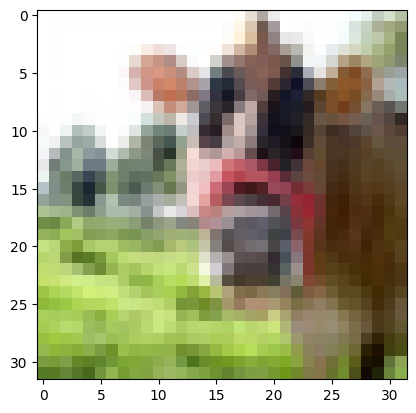

In [ ]:
len(cifar100[0])
a = cifar100[0][0]
b = cifar100[0][1]
print(b)
print(a.shape)
print(type(a))
a = a.transpose(0, 2)
a = a.transpose(0, 1)

plt.imshow(a)

In [ ]:
!python linear_probe.py --encoder proxy-cifar100-resnet10-399-net.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: Tracking run with wandb version 0.16.0
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
==> Preparing data..
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:891: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to cr

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
input_batch = torch.from_numpy(X)
print(input_batch.shape)

with torch.no_grad():
    output = model(input_batch)

torch.Size([10000, 32, 32, 3])


RuntimeError: ignored

In [ ]:
!python simclr.py --arch resnet10 --dataset cifar10 --checkpoint-freq 10

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: Tracking run with wandb version 0.16.1
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
==> Preparing data..
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:891: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
100% 170498071/170498071 [00:11<00:00, 14235471.95it/s]
Extracting /data/cifar10/cifar-10-python.tar.gz to /data/cifar10/
Files already downloaded and verified
Files already downloaded and verified
subset_size: 50000
==> Building model..
step: 0
Loss: 6.039 : 100% 98/98 [00:27<00:00,  3.59it/s]
train_loss: 6.038756881441389
step: 1
Loss: 5.848 : 100% 98/98 [00:27<00:00,  3.

In [9]:
import random
import os
import torch

import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image, ImageFilter
import torch.nn.functional as F

from sas.approx_latent_classes import clip_approx
from sas.subset_dataset import SASSubsetDataset

import torch
from torch import nn

class ProxyModel(nn.Module):
    def __init__(self, net, critic):
        super().__init__()
        self.net = net
        self.critic = critic
    def forward(self, x):
        return self.critic.project(self.net(x))

# Load the proxy model.
net = torch.load("2023-12-1504_30_43.065195-cifar10-resnet10-399-net.pt")
critic = torch.load("2023-12-1504_30_43.065195-cifar10-resnet10-399-critic.pt")
proxy_model = ProxyModel(net, critic)

cifar10 = torchvision.datasets.CIFAR10(
    "/data/cifar10/", transform=transforms.ToTensor(), download=True, train=False)
device = "cuda:0"


def plt2(i, i2):
  """Display two images."""
  fig = plt.figure(figsize=(10, 7))

  # setting values to rows and column variables
  rows = 2
  columns = 1

  fig.add_subplot(rows, columns, 1)

  plt.imshow(i)
  fig.add_subplot(rows, columns, 2)

  plt.imshow(i2)

# x = cifar10[0][0]
# a, b, c = x.shape

# def add_noise_to_image(x):
#   a, b, c = x.shape
#   d = torch.randn(a, b, c) * .3
#   return x + d

# noise32 = {}
# noise224 = {}

# # TODO: Why 224?
# for i in noisy_indices:
#   noise32[i] = torch.randn(3, 32, 32) * .3
#   noise224[i] = torch.randn(3, 224, 224) * .3

first = True

severity = 1

# noise_types = ['fog']

noise_types = [
  # 'brightness.npy',
  # 'contrast.npy',
  # 'defocus_blur.npy',
  # 'elastic_transform.npy',
  # 'fog.npy',
  # 'frost.npy',
  # 'gaussian_blur.npy',
  # 'gaussian_noise.npy',
  # 'glass_blur.npy',
  # 'impulse_noise.npy',
  # 'jpeg_compression.npy',
  # 'motion_blur.npy',
  # 'pixelate.npy',
  # 'saturate.npy',
  # 'shot_noise.npy',
  # 'snow.npy',
  'spatter.npy',
  # 'speckle_noise.npy',
  # 'zoom_blur.npy'
]

# for _ in range(1):
for noise_type in noise_types:
  print(noise_type)
  # fname = noise_type + '.npy'
  DIR = 'CIFAR-10-C'
  cifar10c = np.load(os.path.join(DIR, noise_type))
  # cifar10c = np.load('CIFAR-10-C/fog.npy')

  # for severity in range(1,6):
  for severity in [5]:
    print(severity)
    # Choose noisy indices.
    percent_noisy = .1
    noisy_indices = random.sample(range(1, len(cifar10)), int(percent_noisy * len(cifar10)))

    # Overwrite the CIFAR dataset with my own which replaces specific, pre-chosen
    # samples with noise.
    class MyDataset(torchvision.datasets.CIFAR10):
        def __getitem__(self, index):
            global first
            image, label = super().__getitem__(index)
            # print(image.shape)
            # preprocess = transforms.Compose([
            #   transforms.Resize(256),
            #   transforms.CenterCrop(224),
            #   # transforms.ToTensor(),
            #   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            # ])
            if index in noisy_indices:
              i = (severity - 1) * 10000 + index
              # print('BEN')
              # print(i)
              # print(index)
              # print(image.shape)
              #  torch.nn.functionnal.interpolate.
              trans1 = transforms.ToTensor()
              # trans1 = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(224, 224)),
              #                              transforms.Normalize((0.5,), (0.5,))])
              # trans1 = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(224, 224)),
              #                             transforms.Normalize((0.5,), (0.5,))])

              preprocess = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
              ])

              preprocess2 = preprocess if image.shape[1] == 224 else trans1

              # a = trans1(cifar10c[i])
              # a = preprocess(cifar10c[i])
              # print(a.shape)
              # a = a.permute(2, 0, 1)
              # print(a.shape)

              # out2 = F.interpolate(a.unsqueeze(dim=0), size=(224, 224), mode='bilinear')

              # out2 = out2.squeeze()
              # print(out2.shape)
              # print(out2)

              # a = torch.from_numpy(cifar10c[i])
              a = preprocess2(Image.fromarray(cifar10c[i]))
              b = torch.zeros_like(a)
              c = b + a
              # print(a.shape)
              # a = a.permute(2, 0, 1)
              # a = a / 255.0
              # print(a.shape)
              if first and image.shape[1] == 224:
                # print('BEN')
                first = False
                # plt2(image.permute(1, 2, 0), c.permute(1, 2, 0))
                # print(i)
                # print(c)
                # print(c.shape)
                # print(image)
                # print(image.shape)
                # assert False
              return c, label
              # return image, label
            else:
              return image, label

    # Create dataset.
    cifar_noisy = MyDataset(
        "/data/cifar10/", transform=transforms.ToTensor(), download=True, train=False)

    rand_labeled_examples_indices = random.sample(range(len(cifar_noisy)), 500)
    rand_labeled_examples_labels = [
        cifar_noisy[i][1] for i in rand_labeled_examples_indices]

    partition = clip_approx(
        img_trainset=cifar_noisy,
        labeled_example_indices=rand_labeled_examples_indices,
        labeled_examples_labels=rand_labeled_examples_labels,
        num_classes=100,
        device=device
    )

    subset_fraction = .2

    # Get Subset using SAS
    subset_dataset = SASSubsetDataset(
        dataset=cifar_noisy,
        subset_fraction=subset_fraction,
        num_downstream_classes=100,
        device=device,
        proxy_model=proxy_model,
        approx_latent_class_partition=partition,
        verbose=True
    )

    print(len(cifar_noisy))

    print(len(subset_dataset))
    # print(subset_dataset.subset_indices)

    print(len(noisy_indices))

    inter = set(subset_dataset.subset_indices).intersection(set(noisy_indices))

    print(len(inter))

    print('severity: ' + str(severity))
    print(noise_type)
    print('SAS subset fraction: ' + str(subset_fraction))

    print(len(inter) / len(noisy_indices))

    print('Percent of noisy examples removed (should be close to 1, definitely greater than 1-|subset_fraction|):')
    print(1 - len(inter) / len(noisy_indices))

Files already downloaded and verified
spatter.npy
5
Files already downloaded and verified


Subset Selection:: 100%|██████████| 1/1 [00:07<00:00,  7.59s/it]

Subset Size: 2000
Discarded 8000 examples
10000
2000
1000
368
severity: 5
spatter.npy
SAS subset fraction: 0.2
0.368
Percent of noisy examples removed (should be close to 1, definitely greater than 1-|subset_fraction|):
0.632
